In [1]:
import cv2 
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, orig_img = cap.read()
    cv2.rectangle(orig_img, (0,0), (320,320), (250,0,0) , 2) 
        
    gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (35,35), 0)

    #thresholding
    ret, thresh = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    x, y, w, h = 0, 0, 250, 250
    thresh  = 255 - thresh[y:y + h, x:x + w]
    
    cr_img = cv2.resize(thresh, (18,18))
    cr_img = np.pad(cr_img,((5,5),(5,5)),"constant",constant_values=255)
    
    test_x = np.array(cr_img)
    r = requests.post('http://localhost:9860/', json = {'test_x':test_x.tolist()})
    digit_op_1 = r.json()['result_1']
    digit_op_2 = r.json()['result_2']
    
    orig_img = cv2.putText(orig_img, "NN: "+str(digit_op_1)+", CNN: "+str(digit_op_2) , (300,300), cv2.FONT_HERSHEY_SIMPLEX ,  
                   1,  (0, 255, 0) , 2, cv2.LINE_AA) 
    
    cv2.imshow('frame',orig_img)
    cv2.imshow('frame2',cr_img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.imwrite('digit_image.png',cr_img)
        break
    
cap.release()
cv2.destroyAllWindows()

{'result_1': '6', 'result_2': '1'}


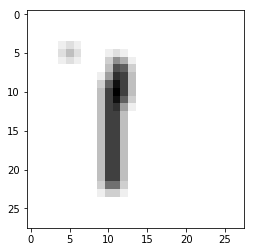

In [3]:
new = cv2.imread('digit_image.png',0)
new = cv2.bitwise_not(new)
ret, new = cv2.threshold(new, 50, 255, cv2.THRESH_BINARY)

new = cv2.GaussianBlur(new,(3,3),0)

test_x = np.array(new)
plt.imshow(test_x,cmap=plt.cm.binary)
r = requests.post('http://localhost:9860/', json = {'test_x':test_x.tolist()})
print(r.json())

Model which was trained on MNIST Dataset - had one thing in common i.e, every image had digit in the middle 18 X 18 pixels.<br>
So the model expects the test-data in the same format as well.<br>
Hence to do that i padded 18 X 18 image with zero values to make it 28 X 28 size.<br>